## **File: spectra_gene_rank.ipynb**
Descrition: THis file works to replicate cody's <br>
work in cNMF and reporting the top gene spectra scores. <br>
Final verisons of these functions are in cnmf_plotting_utils.py

### **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Remake Cody's Work ##
1. This code cell below remakes file: /mnt/md0/cody/scRNA_NMF/VUMC_NMF/VUMC_NMF_k30_dt0_1_spectra.png <br>
2. The plot shows the top 22 genes for each usage based on the genes spectra scores produced in NMF
3. Plotting is employed into a function to be used easier

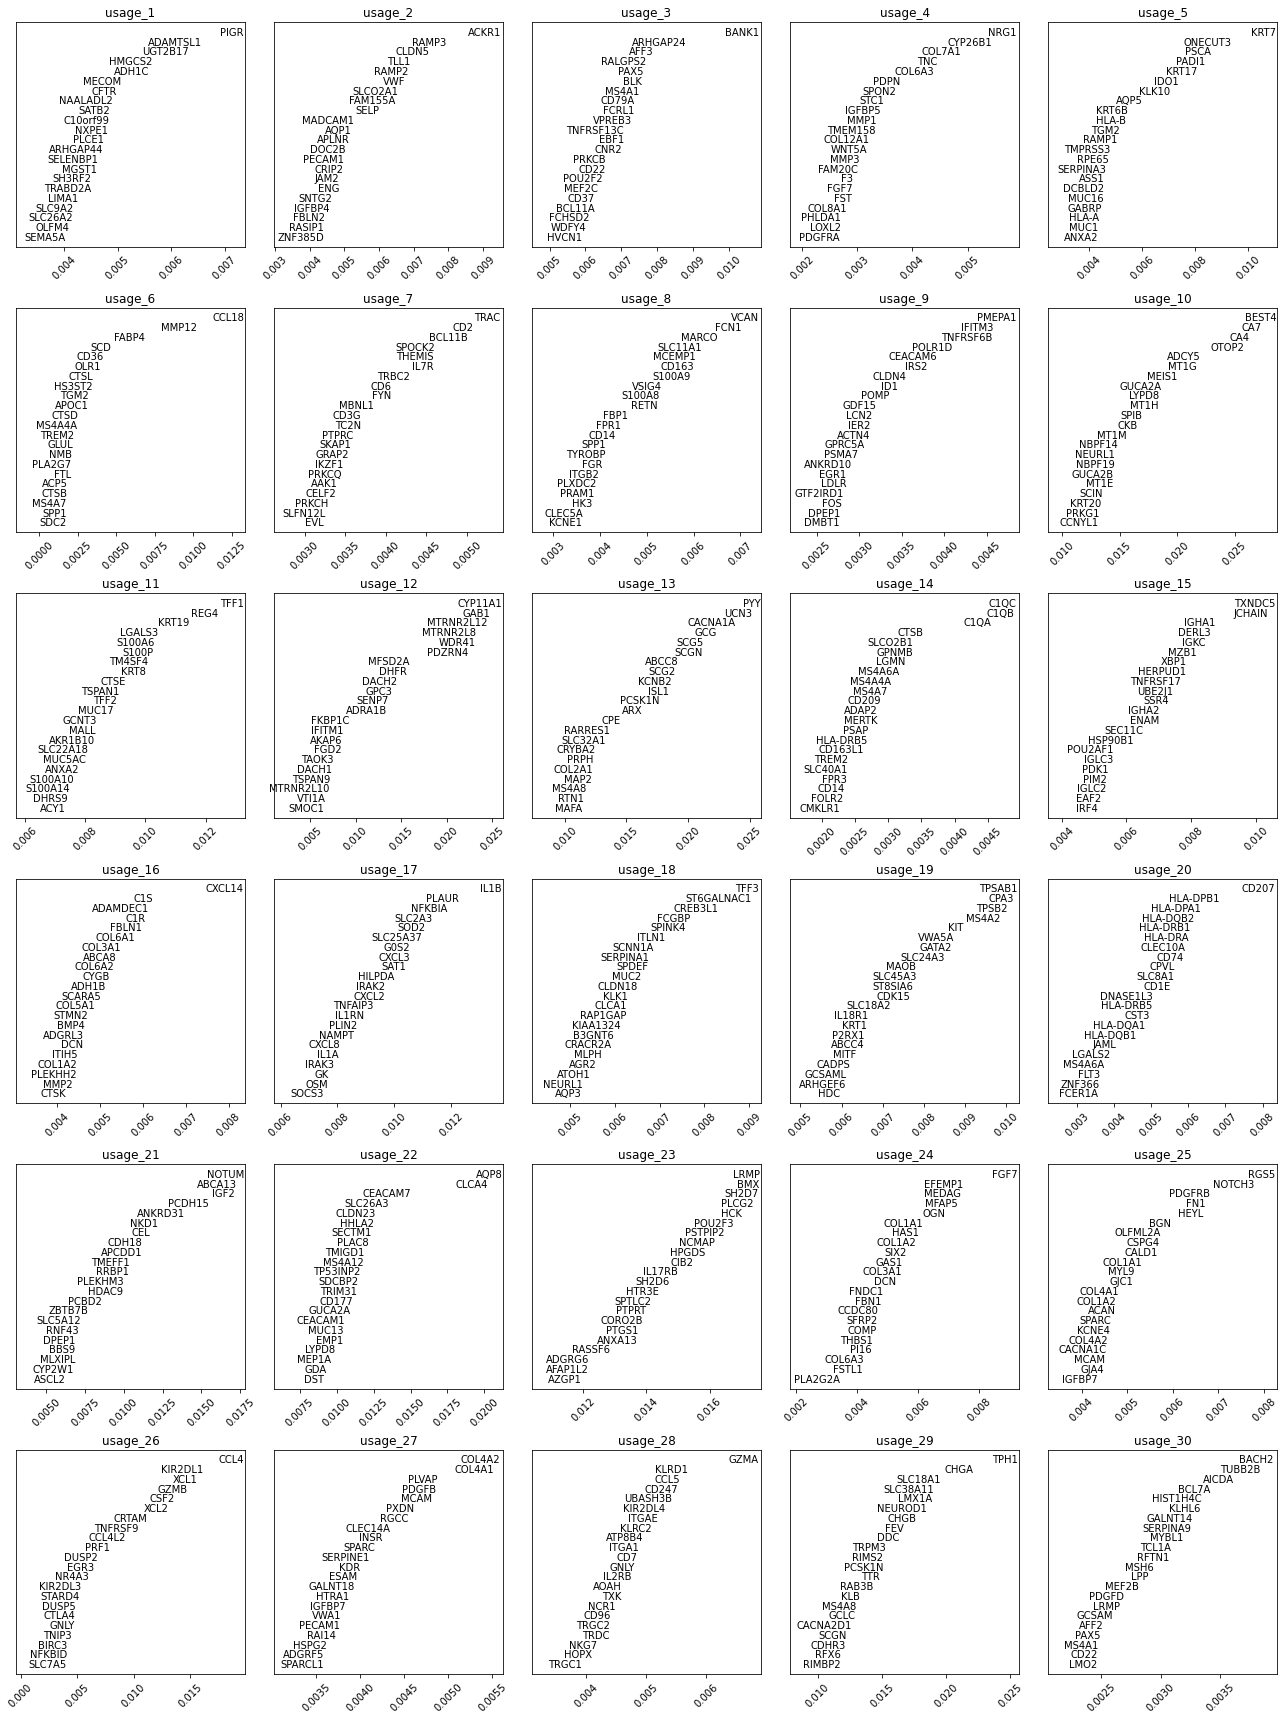

In [2]:
# Load the text file into a pandas DataFrame
df = pd.read_csv("/mnt/md0/cody/scRNA_NMF/VUMC_NMF/VUMC_NMF.gene_spectra_score.k_30.dt_0_1.txt", sep="\t", index_col=0)  # Replace "your_file.txt" with your file name
df = df.transpose()

# Get the number of replicates
num_replicates = len(df.columns)

# Create a 6x5 grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(18, 24))  # Adjust figsize as needed

# Iterate over each replicate and plot on the corresponding subplot
for i in range(num_replicates):
    # Get the data for the current replicate
    replicate_data = df.iloc[:, i]

    # Get the top 22 genes
    top_genes = replicate_data.nlargest(22).index  # Get the top 22 genes
    top_scores = replicate_data.nlargest(22).values  # Get the scores

    # Sort the top scores in ascending order
    sorted_indices = top_scores.argsort()  # Get the indices for sorting
    top_genes = top_genes[sorted_indices]  # Reorder genes based on sorted indices
    top_scores = top_scores[sorted_indices]  # Reorder scores based on sorted indices

    # Plot the gene names at their corresponding scores on the correct subplot
    ax = axes[i // 5, i % 5]  # Get the correct subplot based on the index i
    for j in range(len(top_genes)):
        ax.text(
            top_scores[j],
            j,
            top_genes[j],
            ha='right',
            va='center'
            )
        
    ax.set_title(f"usage_{i+1}")
    ax.set_ylim(-1, len(top_genes)) 
    #ax.set_xlim(0, max(top_scores))

    x_min_percentage = 0.28
    x_min = min(top_scores) - (max(top_scores) - min(top_scores)) * x_min_percentage
    ax.set_xlim(x_min, max(top_scores) + 0.00003)
    
    ax.tick_params(axis='x', rotation=45)  

    ax.set_yticks([])
    ax.set_yticklabels([])
    
# Adjust the spacing between subplots
plt.tight_layout()

fig.set_facecolor('white')

# Save the plot to a PNG file
plt.savefig(
    "/home/james/data/cNMF_out/cody_gene_spectra_score_plot.png",
    dpi=800
    )
plt.show()

In [3]:
def plot_spectra_scores(spectra_file, output_filename="spectra_score_plot.png", fig_rows=6, fig_cols=5, save_plot=True, fig_height = 24, fig_width = 18):
    """Plots the top 22 genes and their scores for each usage in a spectra file.

    Args:
        spectra_file (str): Path to the spectra file.
        output_filename (str, optional): Filename for the saved plot. Defaults to "spectra_score_plot.png".
        fig_rows (int, optional): Number of rows in the plot grid. Defaults to 6.
        fig_cols (int, optional): Number of columns in the plot grid. Defaults to 5.
        save_plot (bool, optional): Whether to save the plot to a file. Defaults to True.
    """
    
    # Load the text file into a pandas DataFrame
    df = pd.read_csv(spectra_file, sep="\t", index_col=0)  # Replace "your_file.txt" with your file name
    df = df.transpose()

    # Get the number of replicates
    num_replicates = len(df.columns)

    # Create a 6x5 grid of subplots
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(fig_width, fig_height))  # Adjust figsize as needed

    # Iterate over each replicate and plot on the corresponding subplot
    for i in range(num_replicates):
        # Get the data for the current replicate
        replicate_data = df.iloc[:, i]

        # Get the top 22 genes
        top_genes = replicate_data.nlargest(22).index  # Get the top 22 genes
        top_scores = replicate_data.nlargest(22).values  # Get the scores

        # Sort the top scores in ascending order
        sorted_indices = top_scores.argsort()  # Get the indices for sorting
        top_genes = top_genes[sorted_indices]  # Reorder genes based on sorted indices
        top_scores = top_scores[sorted_indices]  # Reorder scores based on sorted indices

        # Plot the gene names at their corresponding scores on the correct subplot
        ax = axes[i // fig_cols, i % fig_cols]  # Get the correct subplot based on the index i
        for j in range(len(top_genes)):
            ax.text(
                top_scores[j],
                j,
                top_genes[j],
                ha='right',
                va='center'
                )

        ax.set_title(f"usage_{i+1}")
        ax.set_ylim(-1, len(top_genes))  # Adjust y-axis limits as needed
        #ax.set_xlim(min(top_scores)/1.5, max(top_scores))

        x_min_percentage = 0.28
        x_min = min(top_scores) - (max(top_scores) - min(top_scores)) * x_min_percentage
        ax.set_xlim(x_min, max(top_scores) + 0.00003)
        
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        ax.set_yticks([])
        ax.set_yticklabels([])

    # Adjust the spacing between subplots
    plt.tight_layout()

    fig.set_facecolor('white')

    if save_plot:
        plt.savefig(output_filename, dpi=800)
    plt.show()

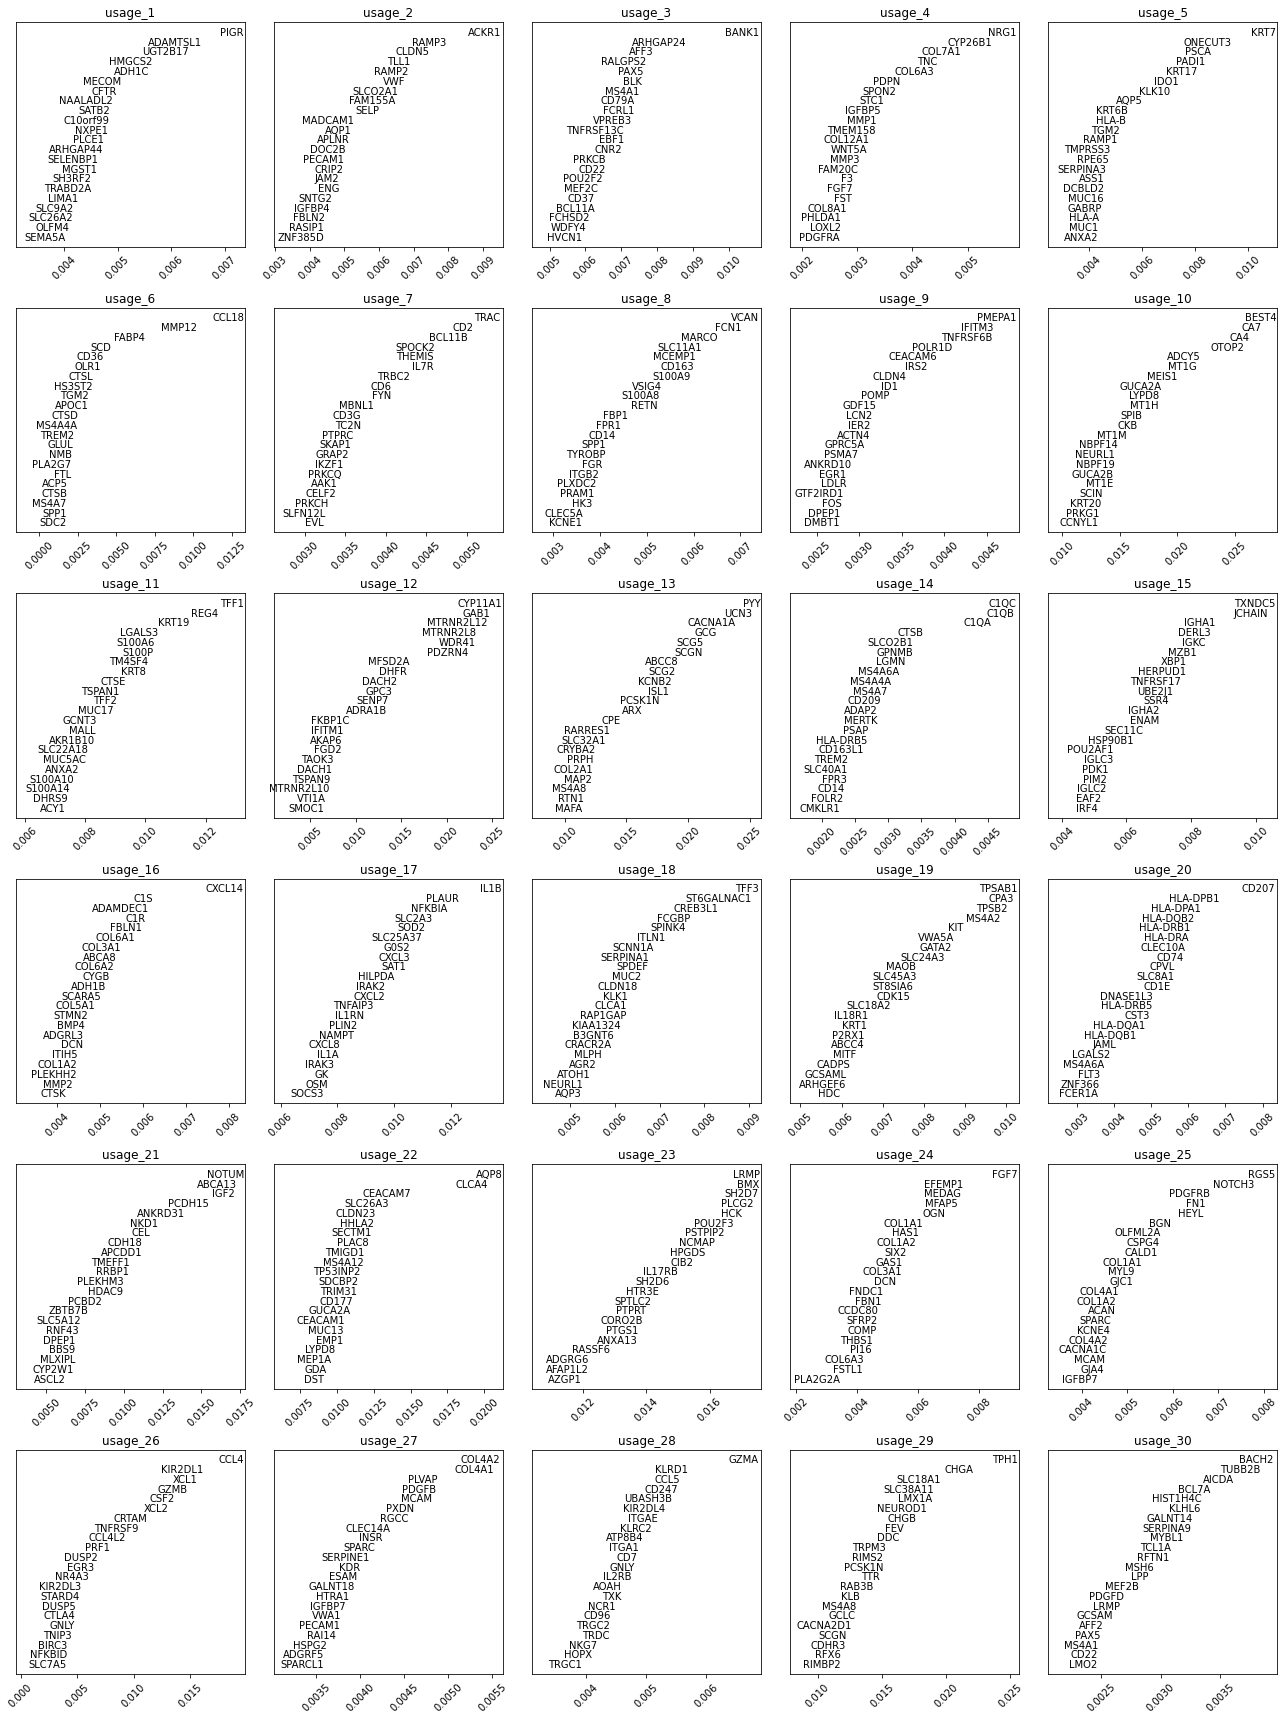

In [4]:
# Example usage:
plot_spectra_scores(
    spectra_file="/mnt/md0/cody/scRNA_NMF/VUMC_NMF/VUMC_NMF.gene_spectra_score.k_30.dt_0_1.txt",
    output_filename="/home/james/data/cNMF_out/cody_VUMC_k30_gene_spectra_score_plot.png",
    fig_rows=6,
    fig_cols=5
    )

## Spectra Scores for Top 22 genes in each Usage ##

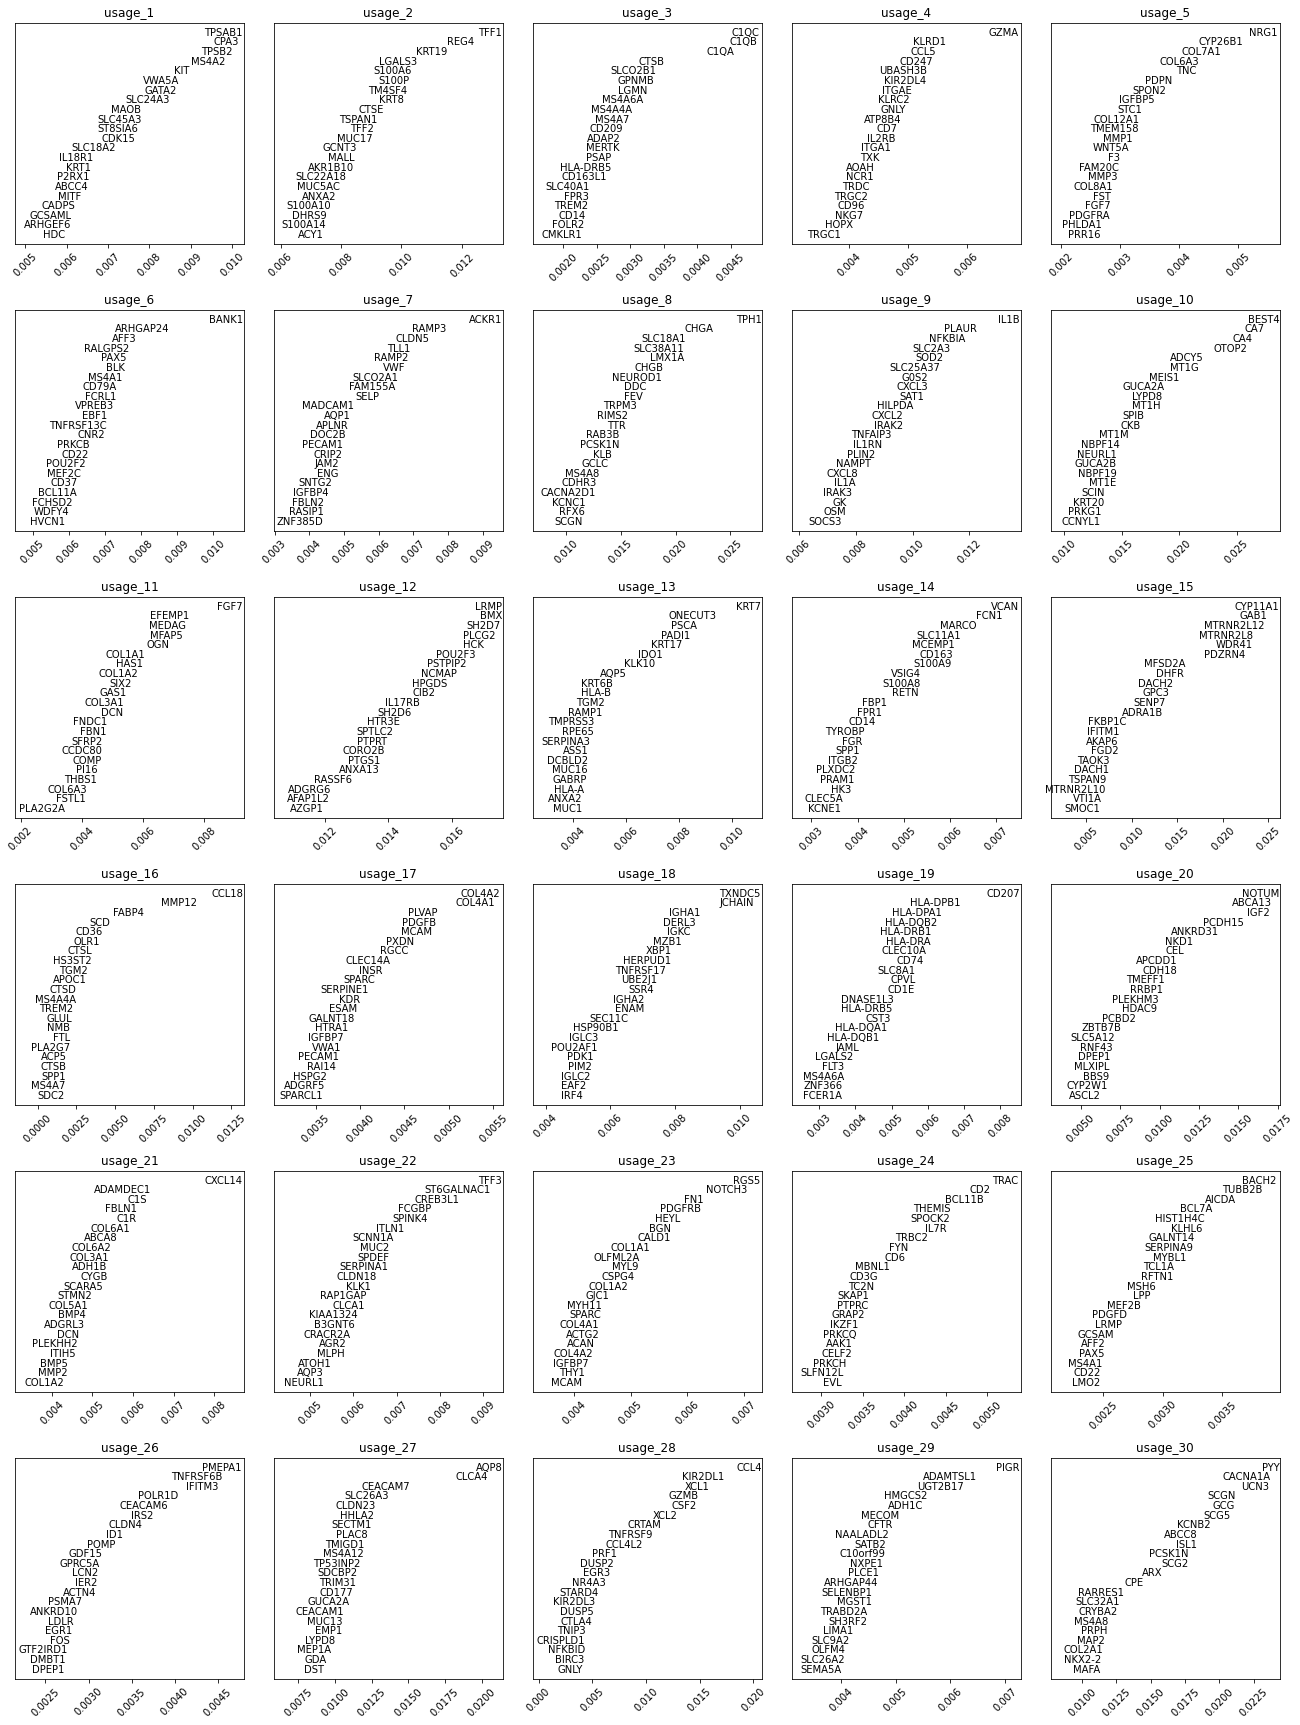

In [5]:
plot_spectra_scores(
    spectra_file="/home/james/data/cNMF_out/VUMC_test_cNMF/VUMC_test_cNMF.gene_spectra_score.k_30.dt_0_05.txt",
    output_filename="/home/james/data/cNMF_out/VUMC_test_cNMF/VUMC_test_gene_spectra_score_plot.png",
    fig_rows=6,
    fig_cols=5
    )

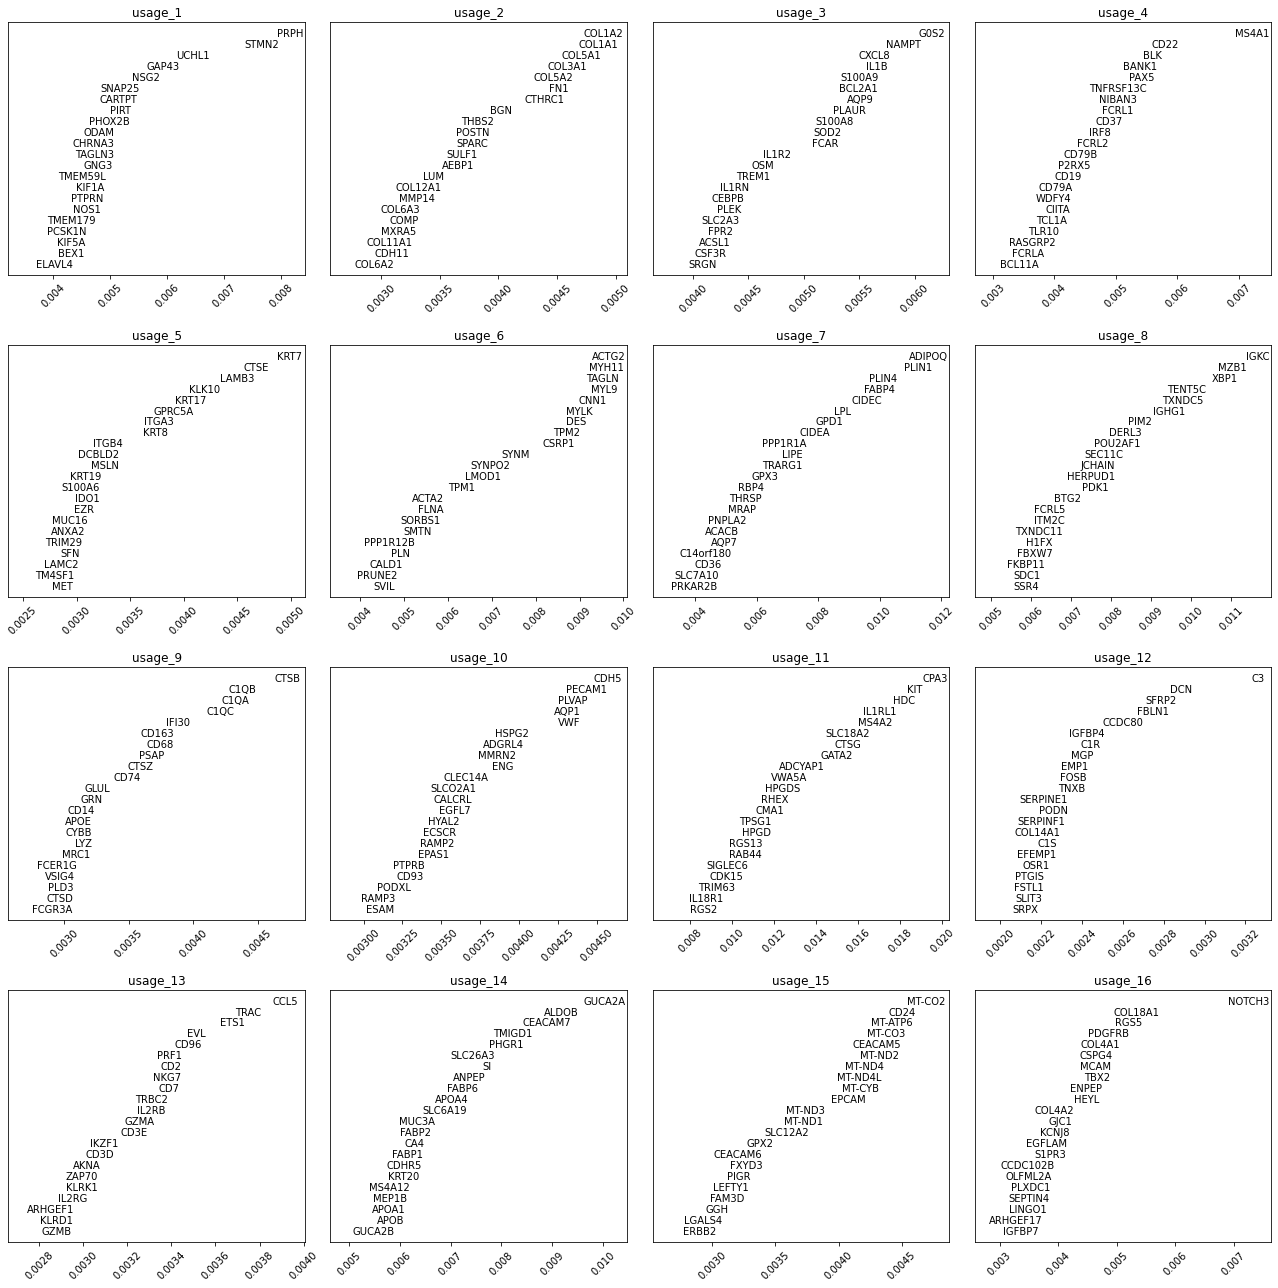

In [7]:
plot_spectra_scores(
    spectra_file = "/home/james/data/cNMF_out/outer_combined_all4_nmf/outer_combined_all4_nmf.gene_spectra_score.k_16.dt_0_05.txt",
    output_filename = "/home/james/data/cNMF_out/outer_combined_all4_nmf/k16_gene_spectra_score_plot.png",
    fig_rows = 4,
    fig_cols = 4, 
    fig_height = 18
    )

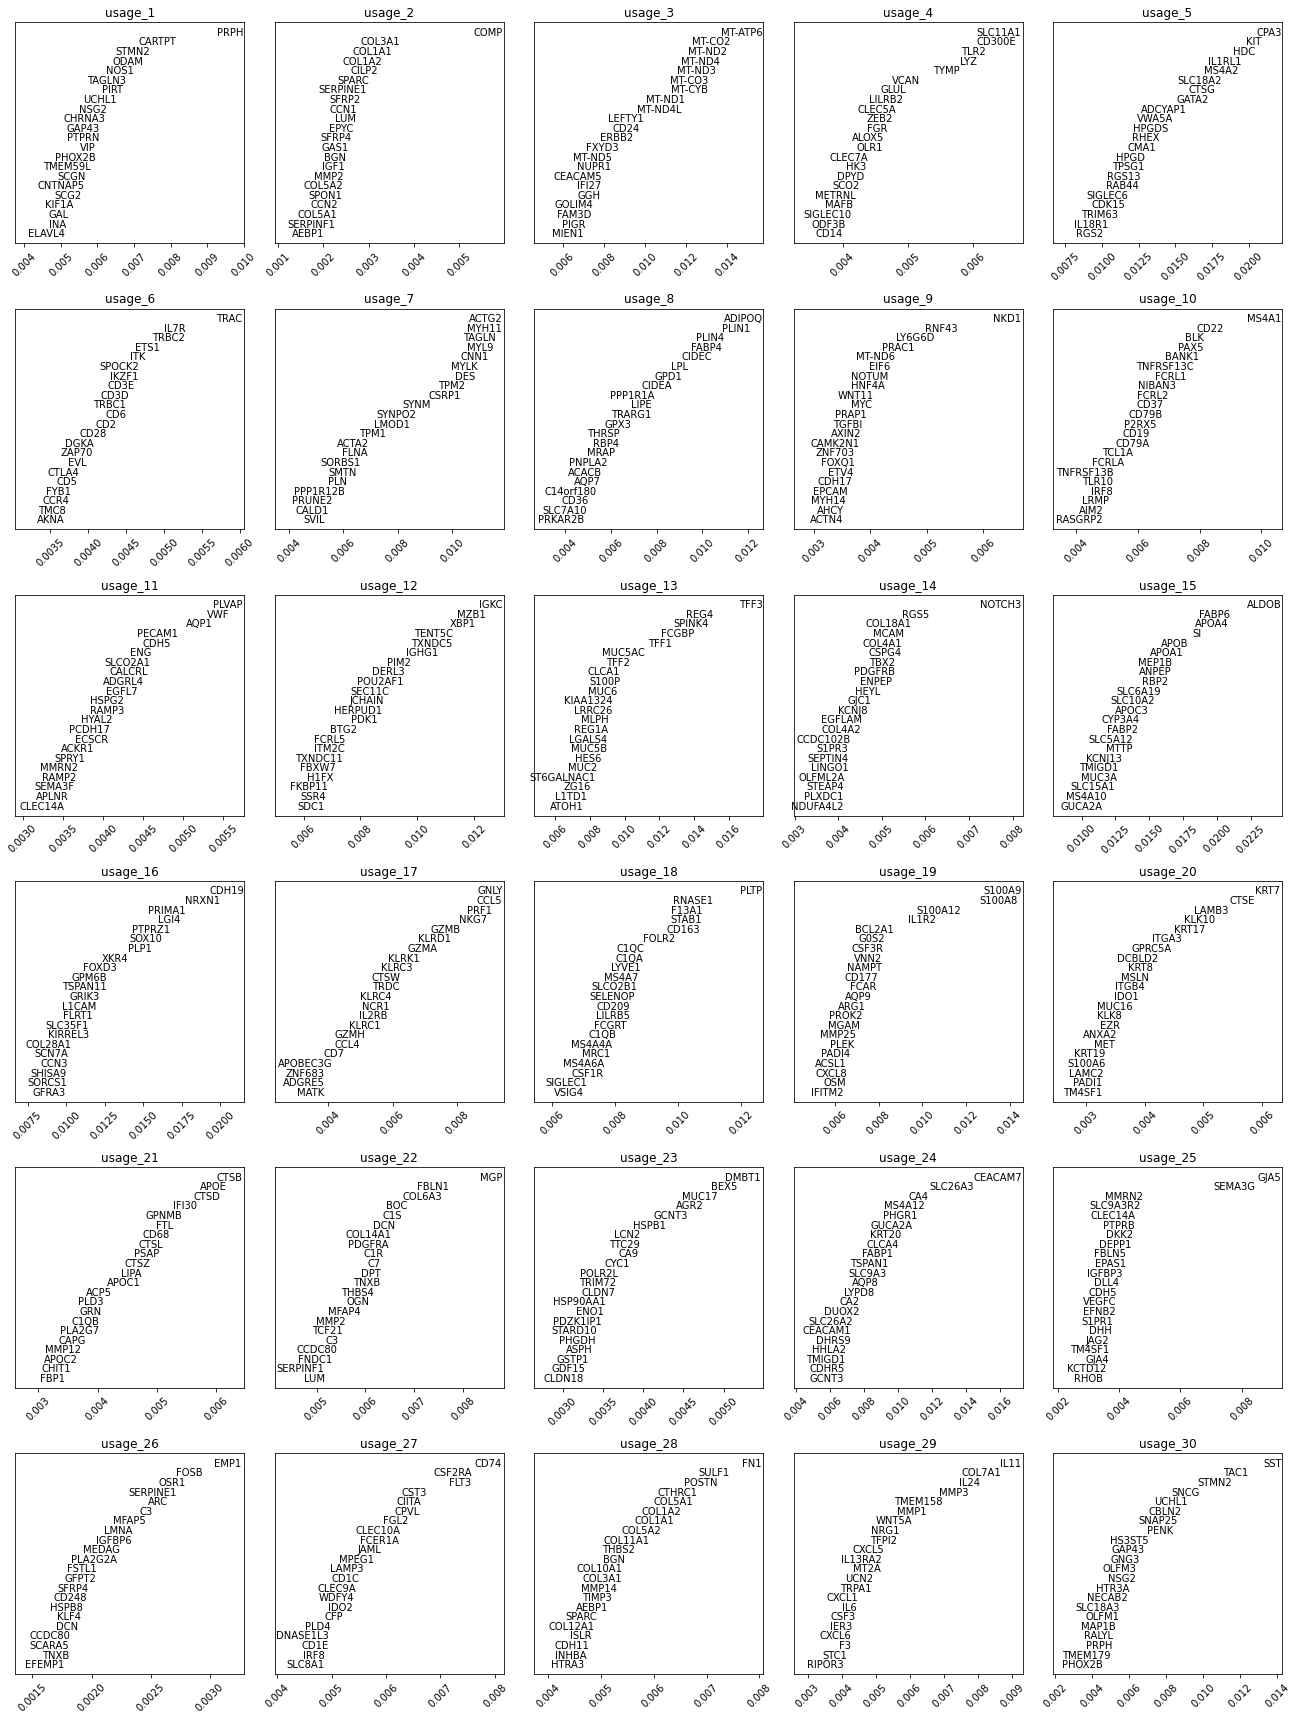

In [8]:
### Immune Eclusion data that has been down sampled
plot_spectra_scores(
    spectra_file = "/home/james/data/cNMF_out/outer_combined_all4_nmf/outer_combined_all4_nmf.gene_spectra_score.k_30.dt_0_05.txt",
    output_filename = "/home/james/data/cNMF_out/outer_combined_all4_nmf/k30_gene_spectra_score_plot.png",
    fig_rows = 6,
    fig_cols = 5
    )

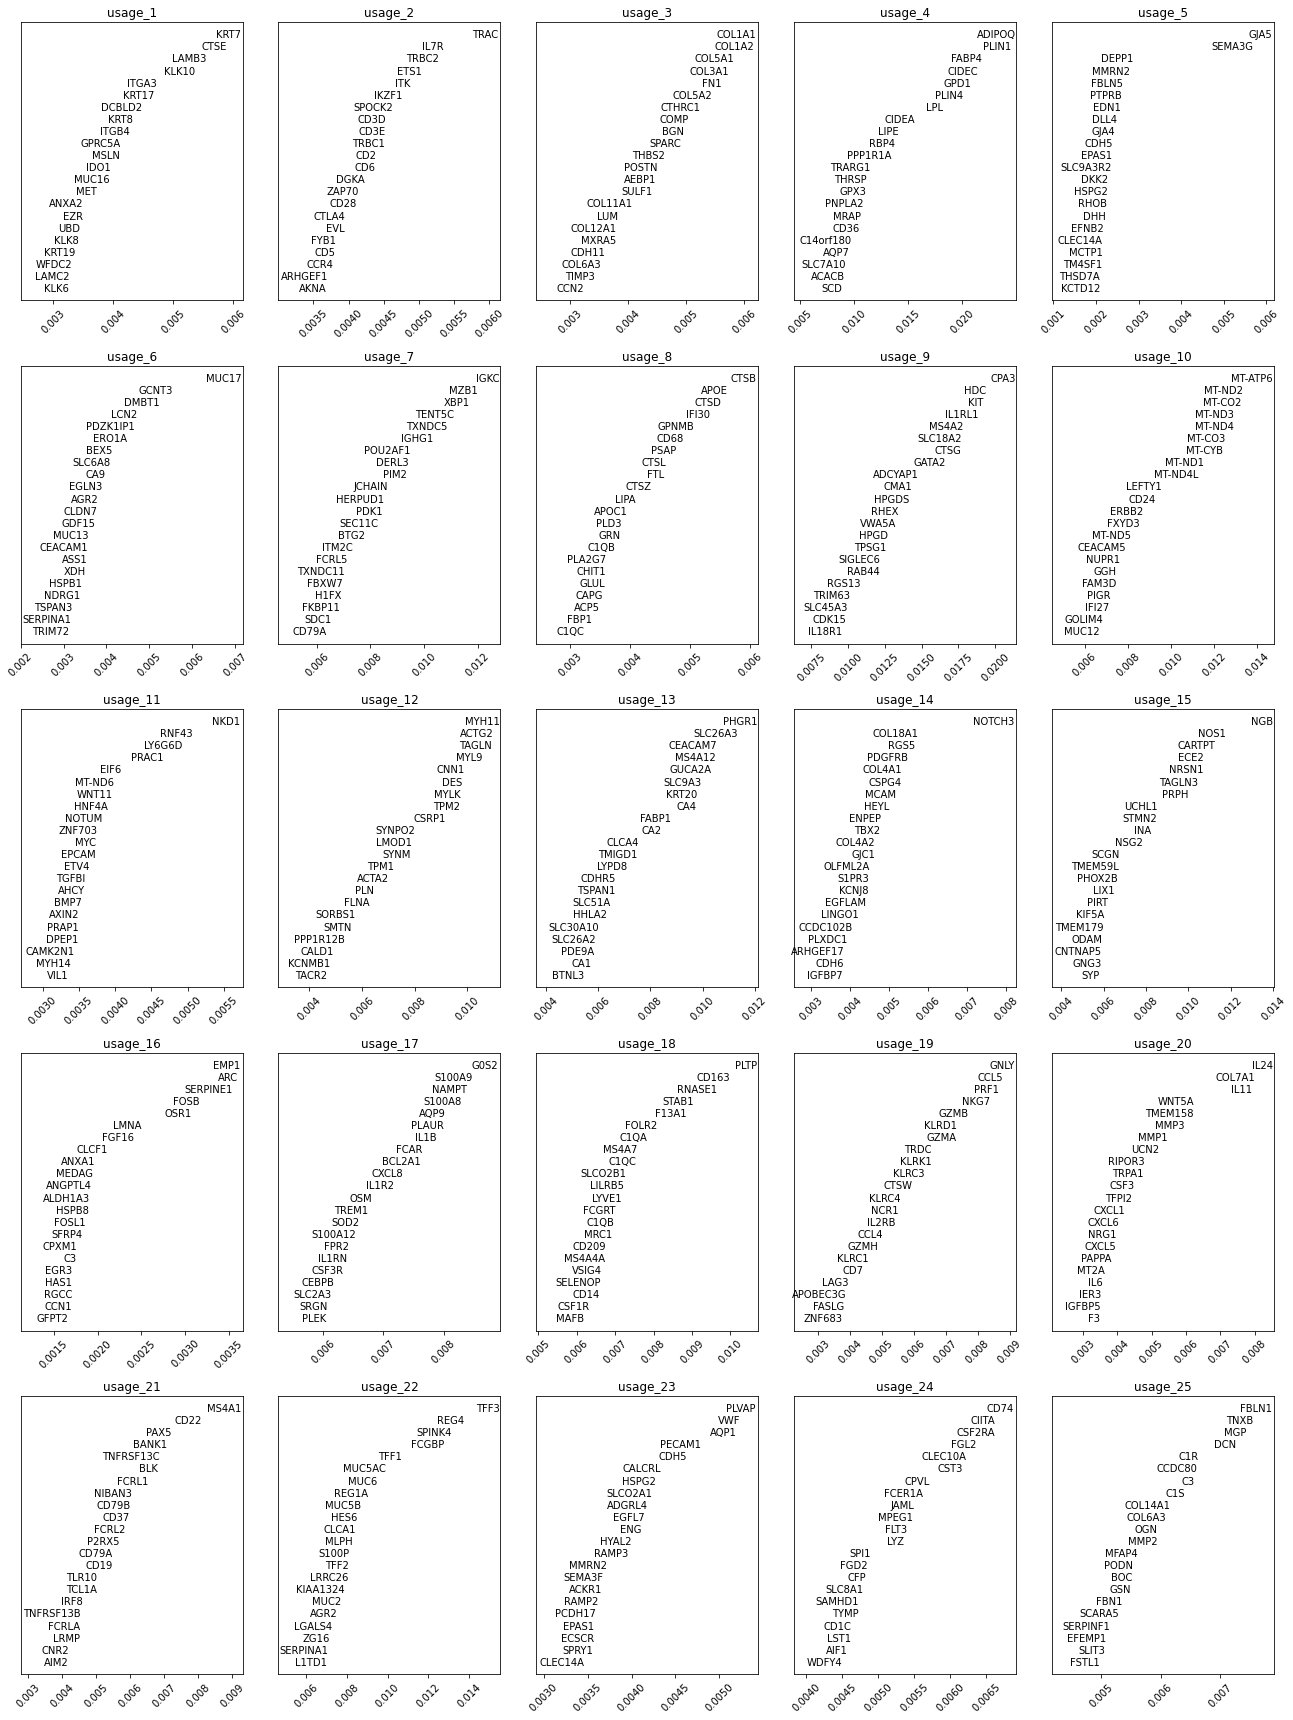

In [9]:
plot_spectra_scores(
    spectra_file = "/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf.gene_spectra_score.k_25.dt_0_05.txt",
    output_filename = "/home/james/data/cNMF_out/ds_immun_excl_nmf/ds_immun_excl_nmf_k25_gene_spectra_score_plot.png",
    fig_rows = 5,
    fig_cols = 5
    )